# Projekt

### Spis treści 
<a id="spis"></a>

1. [Generator zbiorow](#generator)
2. [Wybor zbiorow](#ustalenieZbiorow)
3. [Wizualizacja dla algorytmu Jarvisa](#jarvis)

    - [Jarvis dla zbioru typu a](#jarvisa)
    - [Jarvis dla zbioru typu b](#jarvisb)
    - [Jarvis dla zbioru typu c](#jarvisc)
    - [Jarvis dla zbioru typu d](#jarvisd)
    
4. [Wizualizacja dla algorytmu Grahama](#graham)

    - [Graham dla zbioru typu a](#grahama)
    - [Graham dla zbioru typu b](#grahamb)
    - [Graham dla zbioru typu c](#grahamc)
    - [Graham dla zbioru typu d](#grahamd)
    
5. [Wizualizacja dla algorytmu Gorna-dolna](#goradol)

    - [Gorna-dolna dla zbioru typu a](#goradola)
    - [Gorna-dolna dla zbioru typu b](#goradolb)
    - [Gorna-dolna dla zbioru typu c](#goradolc)
    - [Gorna-dolna dla zbioru typu d](#goradold)
    
6. [Wizualizacja dla algorytmu Przyrostowego](#przyrost)

    - [Przyrostowy dla zbioru typu a](#przyrosta)
    - [Przyrostowy dla zbioru typu b](#przyrostb)
    - [Przyrostowy dla zbioru typu c](#przyrostc)
    - [Przyrostowy dla zbioru typu d](#przyrostd)
    
7. [Wizualizacja dla algorytmu Dziel i zwyciezaj](#dziel)
    - [Dziel i zwyciezaj dla zbioru typu a](#dziela)
    - [Dziel i zwyciezaj dla zbioru typu b](#dzielb)
    - [Dziel i zwyciezaj dla zbioru typu c](#dzielc)
    - [Dziel i zwyciezaj dla zbioru typu d](#dzield)
    
8. [Wizualizacja dla algorytmu Chana](#chan)
    - [Chan dla zbioru typu a](#chana)
    - [Chan dla zbioru typu b](#chanb)
    - [Chan dla zbioru typu c](#chanc)
    - [Chan dla zbioru typu d](#chand)
    
9. [Wizualizacja dla algorytmu Quick hull](#quickhull)
    - [Quick hull dla zbioru typu a](#quickhulla)
    - [Quick hull dla zbioru typu b](#quickhullb)
    - [Quick hull dla zbioru typu c](#quickhullc)
    - [Quick hull dla zbioru typu d](#quickhulld)


<a id='section_id'></a>

### Importy
<a id="konfiguracja"></a>

<a id='section_id'></a>

In [1]:
from lib import *
import numpy as np
from vis.divide_conq_vis import divide_conq_vis
from vis.graham_vis import *
from vis.increase_vis import *
from vis.divide_conq_vis import *
from vis.jarvis_vis import *
from vis.lowerupper_vis import *

# Funkcje wizualizujące Łukasza

# wypisywanie otoczek w czytelnej formie
from pprint import pprint
from copy import deepcopy



<a id='section_id'></a>

# Utilities


<a id='section_id'></a>

# Genertor zbiorów punktów

<a id="generator"></a>
[spis treści](#spis)

<a id='section_id'></a>

<a id='section_id'></a>

In [2]:
import random 
import math
def makeAset(n,x1=-100,y1=100,x2=-100,y2=100):
    return [(random.randint(x1,y1), random.randint(x2,y2)) for i in range(n)]

def makeBset(n,xs=0,ys=0,r=100):
    b = []
    for _ in range(n):
        t = random.random() * (2*math.pi)
        b.append((r*math.sin(t)-xs, r*math.cos(t)-ys))
    return b
        
def makeCset(n,x1=-100,y1=-100,x2=100,y2=-100,x3=100,y3=100,x4=-100,y4=100): # wierzcholki musza byc podawane 
# kolejno w przeciwnym kierunku do ruchu wskazowek 
# zegara makeCset tworzy wszelakie czworokaty, bioirac pod uwage ze prostokaty moglyby byc przechylone wyznaczanie zbiorow
# punktow dla nich bylo by rownie trudne
    C=[]
    a=np.sqrt((x1-x2)**2+(y1-y2)**2)
    b=np.sqrt((x2-x3)**2+(y2-y3)**2)
    c=np.sqrt((x3-x4)**2+(y3-y4)**2)
    d=np.sqrt((x1-x4)**2+(y1-y4)**2)
    obw=a+b+c+d
    s=random.random()*obw

    for _ in range(n):
        s =random.random() * obw
        if s<=a:
            C.append(((x1+(s/a)*(x2-x1),y1+(y2-y1)*(s/a))))
        elif s<=a+b:
            C.append((x2+(x3-x2)*((s-a)/b),y2+(y3-y2)*((s-a)/b)))
        elif s<=a+b+c:
            C.append((x3+(x4-x3)*((s-a-b)/c),y3+(y4-y3)*((s-b-a)/c)))
        else:
            C.append((x4+(x1-x4)*((s-a-b-c)/d),y4+(y1-y4)*((s-b-a-c)/d)))
    return C

def makeDset(x1=0,y1=0,x2=10,y2=0,x3=10,y3=10,x4=0,y4=10,n1=100,n2=100,n=0):
    if(n!=0):
        n1=n
        n2=n
    D=[]
    D.append((x1,y1))
    D.append((x2,y2))
    D.append((x3,y3))
    D.append((x4,y4))
    a=np.sqrt((x2-x1)**2+(y2-y1)**2)
    d=np.sqrt((x3-x1)**2+(y3-y1)**2)
    
    for _ in range(n1):
        s=random.random()*a
        D.append((x1+(x2-x1)*(s/a),y1+(y2-y1)*(s/a)))
        D.append((x4+(x1-x4)*(s/a),y4+(y1-y4)*(s/a)))
    for _ in range(n2):
        s=random.random()*d
        D.append((x1+(x3-x1)*(s/d),y1+(y3-y1)*(s/d)))
        D.append((x2+(x4-x2)*(s/d),y2+(y4-y2)*(s/d)))
    return D   

<a id='section_id'></a>

## Wybor zbiorow

<a id="ustalenieZbiorow"></a>
[spis treści](#spis)


In [3]:
a=makeAset(n=100)
b=makeBset(n=100)
c=makeCset(n=100)
d=makeDset(n=100)

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

# Sekcja Wizualizacji

<a id="wizualizacja"></a>


<a id='section_id'></a>

## Algorytm Jarvisa

<a id="jarvis"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)


<a id='section_id'></a>

### Kod

<a id='section_id'></a>

<a id='section_id'></a>

### Jarvis - wizualizacja dla chmury punktów

<a id="jarvisa"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#jarvis)

<a id='section_id'></a>

Liczba punktow otoczki: 5
Punkty otoczki:
array([[ 78, -99],
       [ -7,  86],
       [-94,  78],
       [-95,  -8],
       [-33, -49]])


<IPython.core.display.Javascript object>


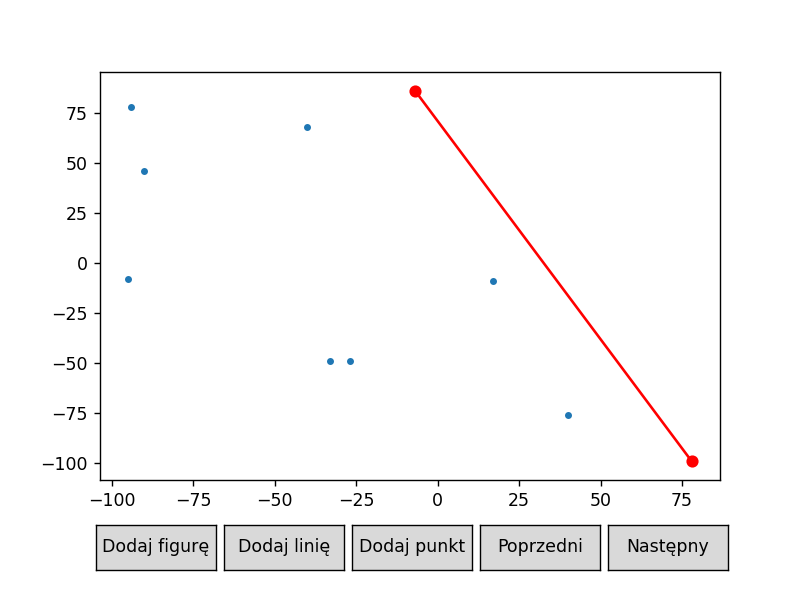

In [4]:
%matplotlib notebook

ch, plot=jarvis_vis(np.array(a))

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Jarvis - wizualizacja dla punktów o rozkładzie kołowym

<a id="jarvisb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#jarvis)

<a id='section_id'></a>

Liczba punktow otoczki: 10
Punkty otoczki:
array([[ 46.07243374, -88.75432862],
       [ 50.79973488,  86.13586324],
       [  4.20125575,  99.91170827],
       [  3.15687972,  99.95015813],
       [-24.70444098,  96.90041587],
       [-30.39990006,  95.26723506],
       [-48.15786499,  87.64028777],
       [-83.96642139,  54.31058902],
       [-97.8759913 , -20.50098356],
       [-91.09325992, -41.2555208 ]])


<IPython.core.display.Javascript object>


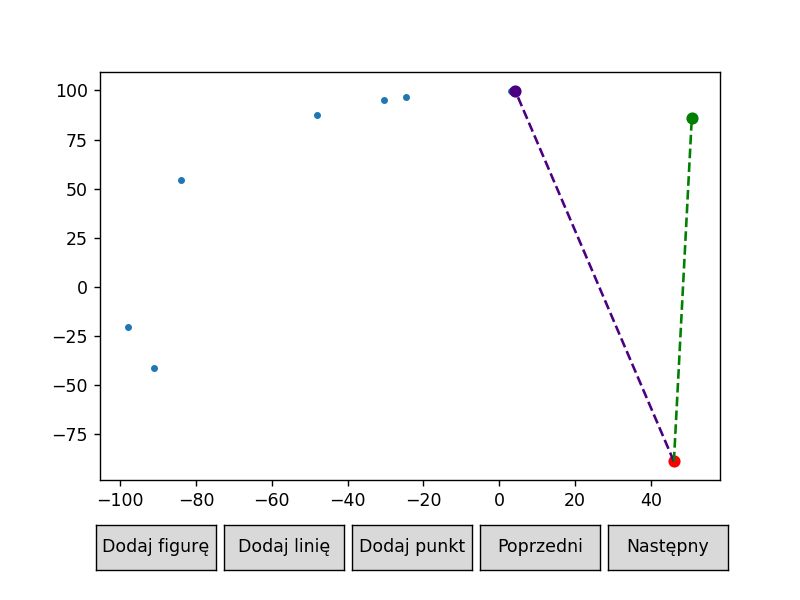

In [5]:
%matplotlib notebook

ch, plot = jarvis_vis(np.array(b))

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Jarvis - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="jarvisc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#jarvis)

<a id='section_id'></a>

Liczba punktow otoczki: 6
Punkty otoczki:
array([[ -54.10812917, -100.        ],
       [ 100.        ,   53.66711166],
       [  88.81890963,  100.        ],
       [ -79.19244324,  100.        ],
       [-100.        ,   99.53430354],
       [-100.        ,  -48.42539143]])


<IPython.core.display.Javascript object>


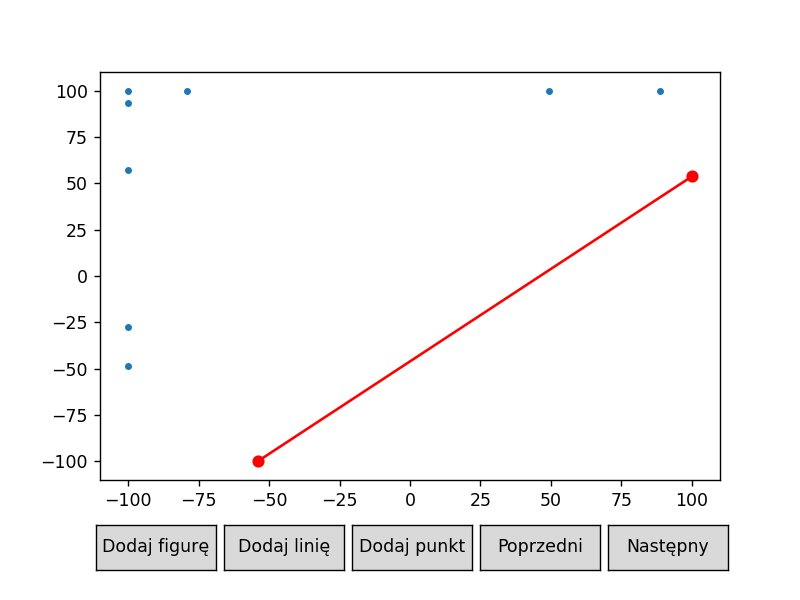

In [6]:
%matplotlib notebook 

ch, plot = jarvis_vis(np.array(c))

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)


plot.draw()

<a id='section_id'></a>

### Jarvis - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="jarvisd"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#jarvis)

Liczba punktow otoczki: 4
Punkty otoczki:
array([[ 0.,  0.],
       [10.,  0.],
       [10., 10.],
       [ 0., 10.]])


<IPython.core.display.Javascript object>


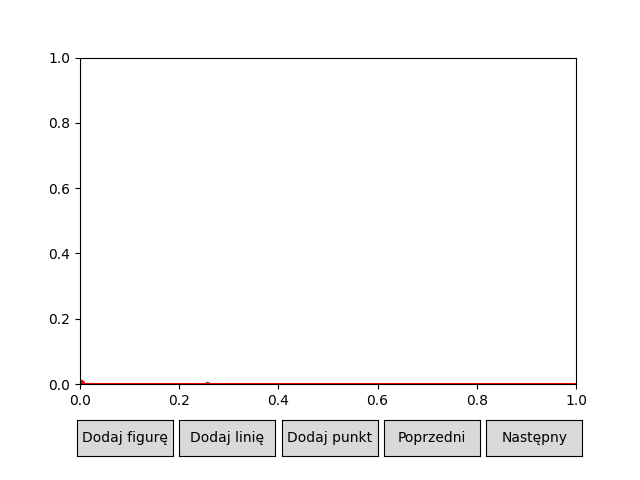

In [7]:
%matplotlib notebook

ch, plot = jarvis_vis(np.array(d))

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)


plot.draw()



<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm Grahama

<a id="graham"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod  

<a id='section_id'></a>

### Graham - wizualizacja dla chmury punktów

<a id="grahama"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#graham)

<a id='section_id'></a>

Liczba punktow otoczki: 5
Punkty otoczki:
[(78, -99), (-7, 86), (-94, 78), (-95, -8), (-33, -49)]


<IPython.core.display.Javascript object>


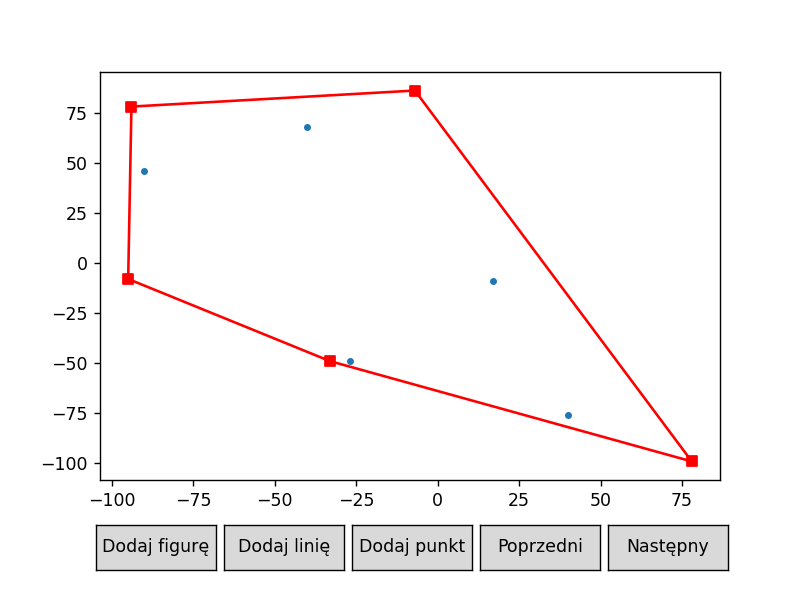

In [8]:
%matplotlib notebook

# przekazujemy kopię listy punktów, ponieważ algorytm sortujący modyfikuje listę w miejscu
ch, plot = graham_vis(a.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()


<a id='section_id'></a>

### Graham - wizualizacja dla punktów o rozkładzie kołowym

<a id="grahamb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#graham)

<a id='section_id'></a>

Liczba punktow otoczki: 10
Punkty otoczki:
[(46.07243373940288, -88.75432862304989),
 (50.79973488469781, 86.13586323735554),
 (4.201255748035941, 99.91170827355317),
 (3.1568797152115335, 99.95015813125903),
 (-24.704440979322573, 96.90041587062032),
 (-30.399900062031925, 95.2672350612658),
 (-48.157864986712994, 87.64028776722223),
 (-83.96642138573422, 54.31058901976036),
 (-97.87599130142159, -20.50098355601613),
 (-91.0932599225864, -41.25552080238613)]


<IPython.core.display.Javascript object>


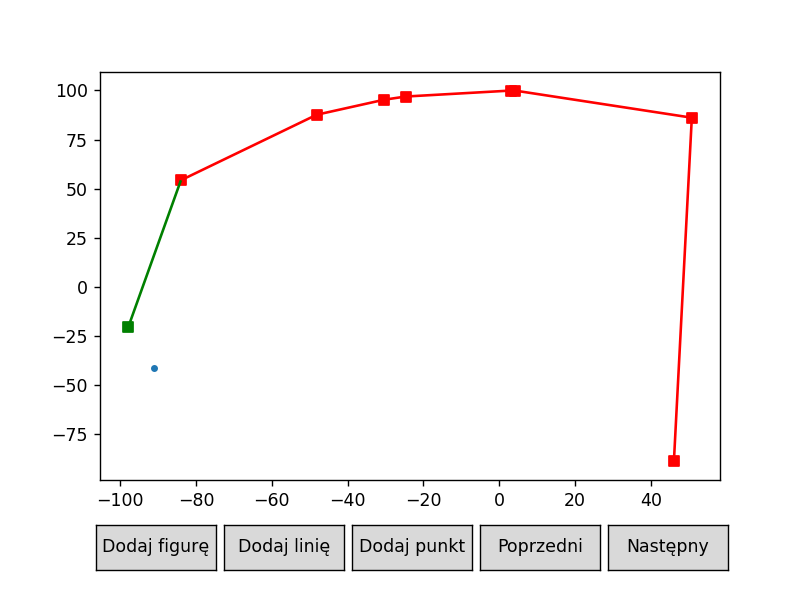

In [7]:
%matplotlib notebook

# przekazujemy kopię listy punktów, poinieważ algorytm sortujący modyfikuje listę w miejscu
ch, plot = graham_vis(b.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)


plot.draw()

<a id='section_id'></a>

### Graham - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="grahamac"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#graham)

<a id='section_id'></a>

Liczba punktow otoczki: 6
Punkty otoczki:
[(-95.31027747721063, -100.0),
 (-46.01122043053296, -100.0),
 (100.0, -70.03486311546041),
 (89.4383927271204, 100.0),
 (-96.44442631606762, 100.0),
 (-100.0, -32.47989350509181)]


<IPython.core.display.Javascript object>


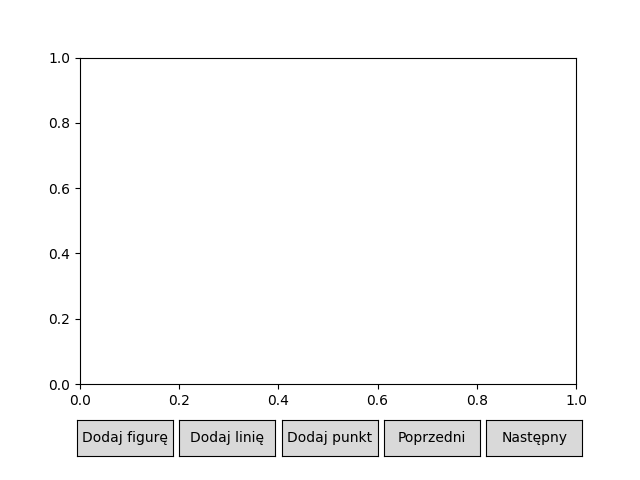

In [10]:
%matplotlib notebook

# przekazujemy kopię listy punktów, ponieważ algorytm sortujący modyfikuje listę w miejscu
ch, plot=graham_vis(c.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Graham - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="grahamd"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#graham)
            

Liczba punktow otoczki: 4
Punkty otoczki:
[(0, 0), (10, 0), (10, 10), (0, 10)]


<IPython.core.display.Javascript object>


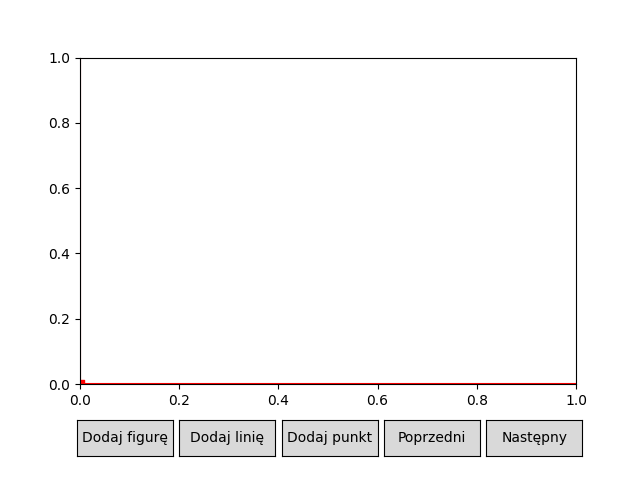

In [11]:
%matplotlib notebook

# przekazujemy kopię listy punktów, ponieważ algorytm sortujący modyfikuje listę w miejscu
ch, plot = graham_vis(d.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm gorna - dolna

<a id="goradol"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod

<a id='section_id'></a>

<a id='section_id'></a>

### Gorna-dolna - wizualizacja dla chmury punktów

<a id="goradola"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#goradol)

<a id='section_id'></a>

Liczba punktow otoczki: 6
Punkty otoczki:
[(-91, 42), (-50, 73), (33, 74), (86, 54), (46, -14), (-52, -39)]


<IPython.core.display.Javascript object>


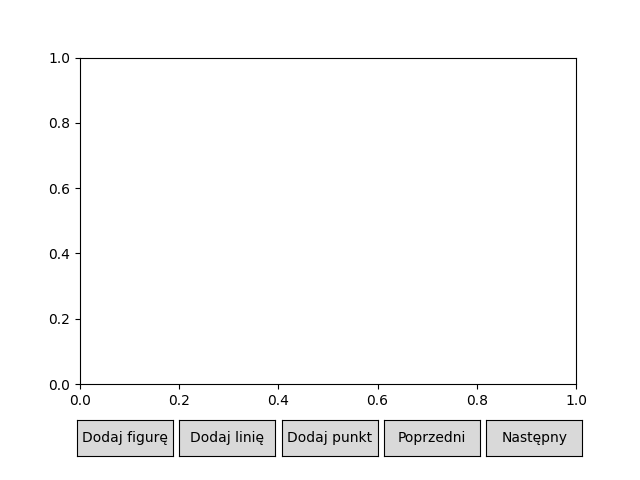

In [12]:
%matplotlib notebook

ch, plot = lower_upper_vis(a.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Gorna-dolna - wizualizacja dla punktów o rozkładzie kołowym

<a id="goradolb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#goradol)

<a id='section_id'></a>

Liczba punktow otoczki: 10
Punkty otoczki:
[(-89.90989248641598, -43.774550061435434),
 (-55.34204470066104, 83.29020403594912),
 (-38.03956850106677, 92.48238334003211),
 (-12.685798696367323, 99.19208895590033),
 (28.261382659950314, 95.92337697426973),
 (46.807710185554704, 88.36876296059098),
 (96.42170814529719, -26.511397517730533),
 (29.659801406809507, -95.50024178246159),
 (-37.8873105637173, -92.5448631651073),
 (-87.61867467296238, -48.19717676953268)]


<IPython.core.display.Javascript object>


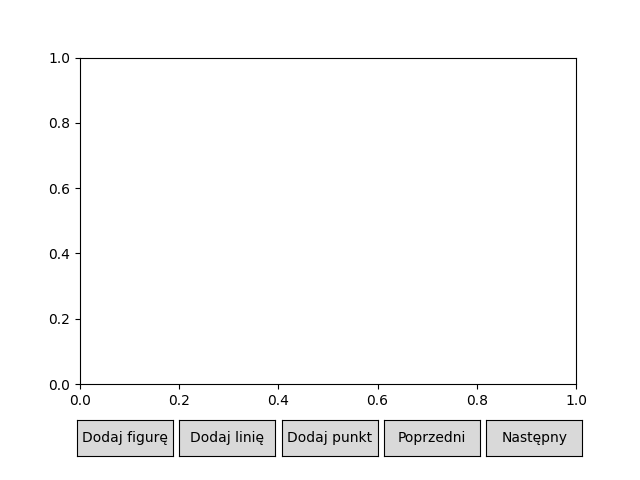

In [13]:
%matplotlib notebook

ch, plot = lower_upper_vis(b.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Gorna-dolna - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="goradolc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#goradol)

<a id='section_id'></a>

Liczba punktow otoczki: 6
Punkty otoczki:
[(-100.0, -32.47989350509181),
 (-96.44442631606762, 100.0),
 (89.4383927271204, 100.0),
 (100.0, -70.03486311546041),
 (-46.01122043053296, -100.0),
 (-95.31027747721063, -100.0)]


<IPython.core.display.Javascript object>


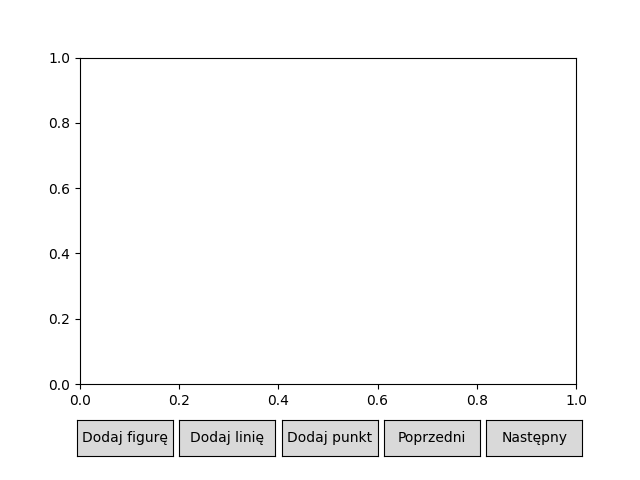

In [14]:
%matplotlib notebook

ch, plot = lower_upper_vis(c.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Gorna-dolna - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="goradold"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#goradol)

<a id='section_id'></a>

Liczba punktow otoczki: 4
Punkty otoczki:
[(0, 0), (0, 10), (10, 10), (10, 0)]


<IPython.core.display.Javascript object>


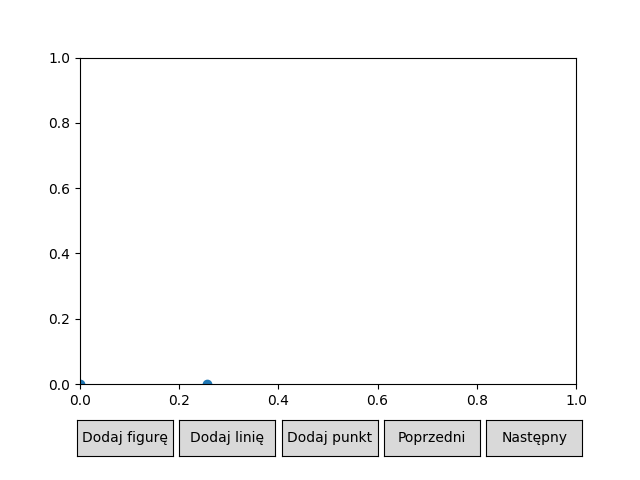

In [15]:
%matplotlib notebook

ch, plot = lower_upper_vis(d.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm przyrostowy

<a id="przyrost"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod

<a id='section_id'></a>

<a id='section_id'></a>

### Przyrostowy - wizualizacja dla chmury punktów

<a id="przyrosta"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

<a id='section_id'></a>

Liczba punktow otoczki: 6
Punkty otoczki:
[(-91, 42), (-52, -39), (46, -14), (86, 54), (33, 74), (-50, 73)]


<IPython.core.display.Javascript object>


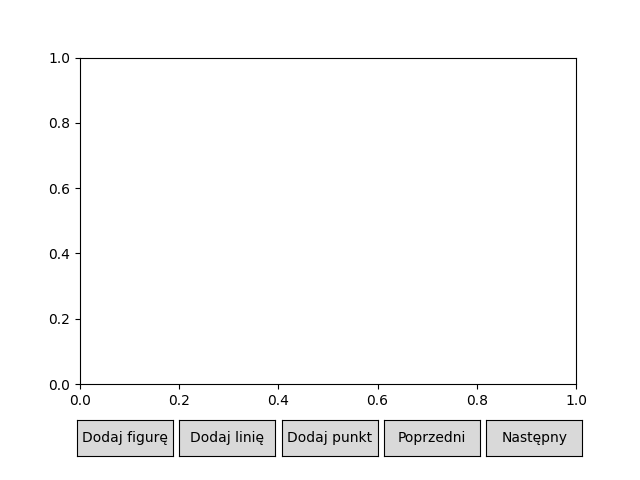

In [16]:
%matplotlib notebook

ch, plot = increase_with_sorting_vis(a.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Przyrostowy- wizualizacja dla punktów o rozkładzie kołowym

<a id="przyrostb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

<a id='section_id'></a>

Liczba punktow otoczki: 10
Punkty otoczki:
[(-89.90989248641598, -43.774550061435434),
 (-87.61867467296238, -48.19717676953268),
 (-37.8873105637173, -92.5448631651073),
 (29.659801406809507, -95.50024178246159),
 (96.42170814529719, -26.511397517730533),
 (46.807710185554704, 88.36876296059098),
 (28.261382659950314, 95.92337697426973),
 (-12.685798696367323, 99.19208895590033),
 (-38.03956850106677, 92.48238334003211),
 (-55.34204470066104, 83.29020403594912)]


<IPython.core.display.Javascript object>


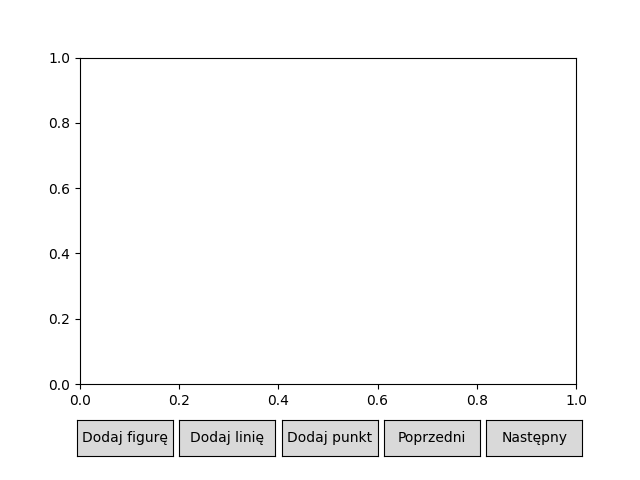

In [17]:
%matplotlib notebook

ch, plot = increase_with_sorting_vis(b.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Przyrostowy - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="przyrostc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

<a id='section_id'></a>

In [9]:
%matplotlib notebook

ch, plot = increase_with_sorting_vis(c.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

KeyboardInterrupt: 

<a id='section_id'></a>

### Przyrostowy - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="przyrostd"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

<a id='section_id'></a>

In [10]:
%matplotlib notebook

d = makeDset(n=2)
print(d)
ch, plot = increase_with_sorting_vis(d.copy())

# print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
# pprint(ch)

plot.draw()

[(0, 0), (10, 0), (10, 10), (0, 10), (4.749216757142235, 0.0), (0.0, 5.250783242857765), (7.503453326068721, 0.0), (0.0, 2.496546673931279), (4.497270707726712, 4.497270707726712), (5.502729292273288, 4.497270707726712), (6.108431127975908, 6.108431127975908), (3.8915688720240924, 6.108431127975908)]


KeyboardInterrupt: 

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm dziel i zwyciezaj

<a id="dziel"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod

<a id='section_id'></a>

<a id='section_id'></a>

### Dziel i zwyciezaj - wizualizacja dla chmury punktów

<a id="dziela"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#dziel)

<a id='section_id'></a>

Liczba punktow otoczki: 6
Punkty otoczki:
[(-90, 5),
 (-91, -6),
 array([-83, -91]),
 (-16, -71),
 array([ 28, -19]),
 array([28, 62])]


<IPython.core.display.Javascript object>


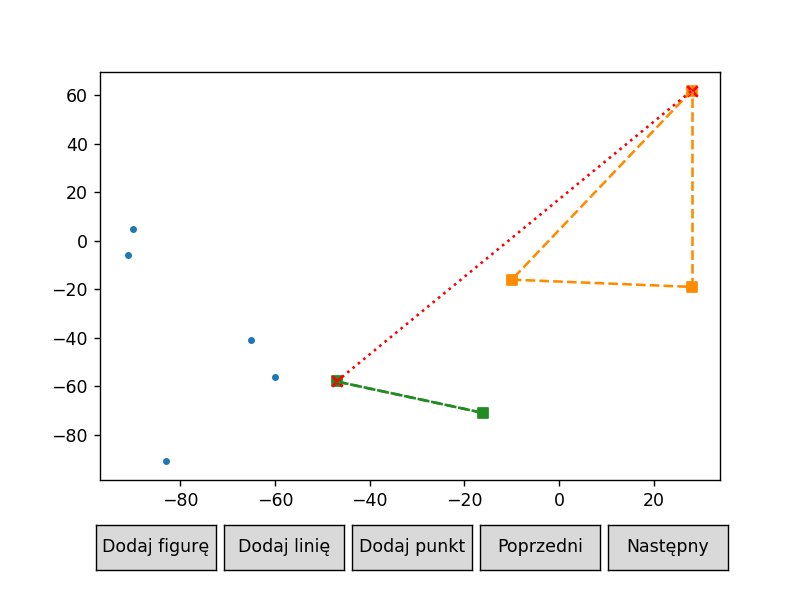

In [11]:
%matplotlib notebook

k = 3 

a = makeAset(n=10)
ch, plot = divide_conq_vis(a.copy(), k)

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Dziel i zwyciezaj - wizualizacja dla punktów o rozkładzie kołowym

<a id="dzielb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#dziel)

<a id='section_id'></a>

Liczba punktow  otoczki: 10
Punkty otoczki:
[array([-38.0395685 ,  92.48238334]),
 array([-55.3420447 ,  83.29020404]),
 array([-89.90989249, -43.77455006]),
 array([-87.61867467, -48.19717677]),
 array([-37.88731056, -92.54486317]),
 array([ 29.65980141, -95.50024178]),
 array([ 96.42170815, -26.51139752]),
 array([46.80771019, 88.36876296]),
 array([28.26138266, 95.92337697]),
 array([-12.6857987 ,  99.19208896])]


<IPython.core.display.Javascript object>


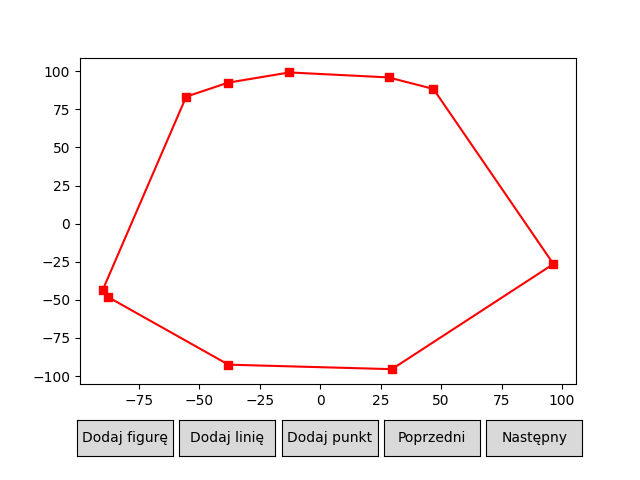

In [19]:
%matplotlib notebook

k = 5
ch, plot = divide_conq_vis(b.copy(), k)

print(f'Liczba punktow  otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Dziel i zwyciezaj  - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="dzielc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#dziel)

<a id='section_id'></a>

Liczba punktow otoczki: 8
Punkty otoczki:


<IPython.core.display.Javascript object>


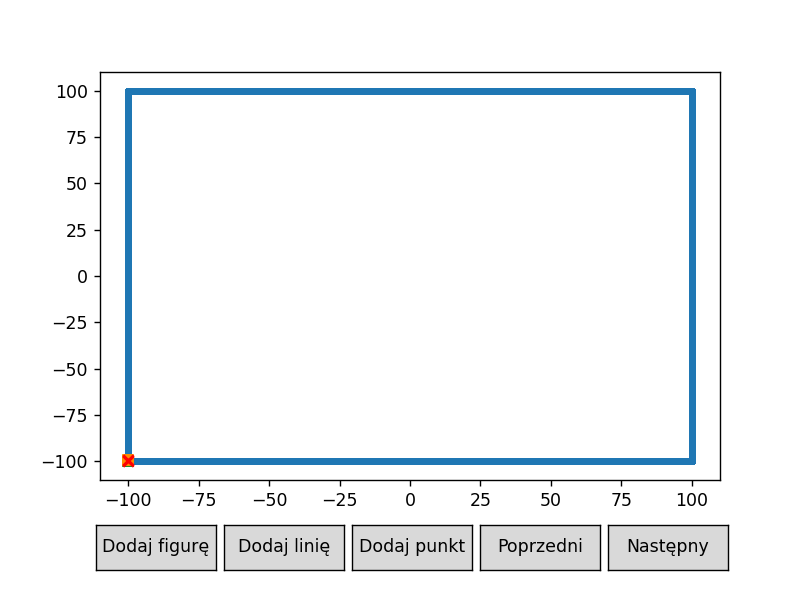

In [12]:
%matplotlib notebook

k = 5

c = makeCset(n = 20000)

ch, plot = divide_conq_vis(c.copy(), k)

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
# pprint(ch)

plot.draw()


<a id='section_id'></a>

### Dziel i zwyciezaj  - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="dzield"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#dziel)

<a id='section_id'></a>

Liczba punktow otoczki: 4
Punkty otoczki:
[array([ 0., 10.]), array([0., 0.]), array([10.,  0.]), array([10., 10.])]


<IPython.core.display.Javascript object>


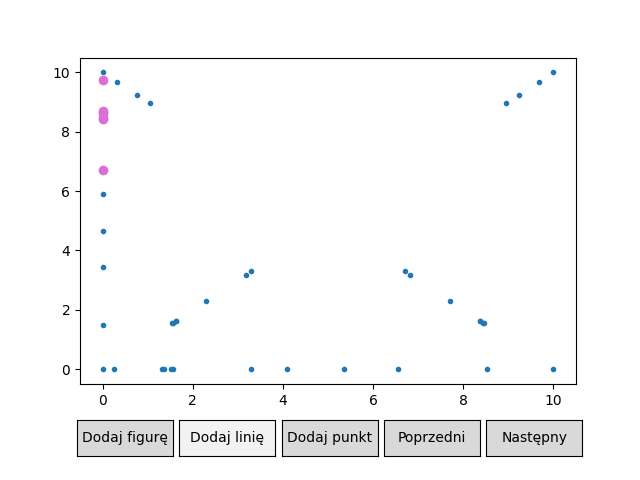

In [27]:
%matplotlib notebook

k = 5
ch, plot = divide_conq_vis(d.copy(), k)

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm chana

<a id="chan"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod

<a id='section_id'></a>

In [13]:
from copy import deepcopy
from pure.graham import *

def nextvert(C,curr,plot=None,ans=None,points=None):#dla danego punktu wspolzednymi z Q[i][j] jesli jest to punkt nalezacy do finalnej otoczki, to
    #zwraca nastepny punkt nalezacy do finalnej otoczki zadanego w takich samych wspolzednych Q[nxt[0]][nxt[1]]
    i,j=curr
    nxt=(i,(j+1)%len(C[i]))
    for k in range(len(C)):
        t=tangent(C[i][j],C[k])
        if t== None : 
            continue
        
        if plot!=None:
            plot.add_scene(Scene(points=[PointsCollection(deepcopy(points)), PointsCollection(deepcopy(ans),color='green'),
                                         PointsCollection(deepcopy(C[k]),color='red'),
                                         PointsCollection([C[k][t]],color='firebrick'),
                                        PointsCollection([C[nxt[0]][nxt[1]]],color='violet')],
                                lines=[LinesCollection(makeSheaf(ans),color='yellow'),
                                      LinesCollection([[ans[len(ans)-1],C[nxt[0]][nxt[1]]]],color='violet'),
                                      LinesCollection([[ans[len(ans)-1],C[k][t]]],color='firebrick'),
                                      LinesCollection(makeFullSheaf(C[k]),color='red')]))
        
        if k!=i and compr(C[nxt[0]][nxt[1]],C[k][t],C[i][j])>0 and (k,t)!=(curr):
            nxt=(k,t)
    
    return nxt

def chanUtil(points,m,plot=None):
    Q=divide(points,m)
    C=[]
    for i in range(len(Q)):
        C.append(graham(Q[i]))
        
    if plot!=None:
        pkt=[PointsCollection(deepcopy(Q[i]),color=randomColor()) for i in range(len(Q))]

        plot.add_scene(Scene(points=pkt))
        
        lns=[LinesCollection(makeFullSheaf(C[i]),color=randomColor()) for i in range(len(C))]
        pkt=[PointsCollection(deepcopy(C[i])) for i in range(len(Q))]
        
        plot.add_scene(Scene(points=pkt,lines=lns))
    
    curr=(0,0)
    ans=[]
    i=0
    while i<m:
        ans.append(C[curr[0]][curr[1]])
        if plot!= None :
            plot.add_scene(Scene(points=[PointsCollection(deepcopy(points)),PointsCollection(deepcopy(ans),color='green')],
                           lines=[LinesCollection(makeSheaf(ans),color='yellow')]))
                               
        nxt=nextvert(C,curr,plot,ans,points)
        if nxt == (0,0):
            return ans
        curr=nxt
        i+=1
        
    
    return None      

def chan(points,visual=False):
    plot=None
    if visual:
        plot=Plot(scenes=[Scene(points=[PointsCollection(deepcopy(points))])])
    n=len(points)
    m=4
    hoax=None
    while hoax==None:
        hoax=chanUtil(points,m,plot)
        m=min(n,m*m)
    
    if visual == True:
        plot.add_scene(Scene(points=[PointsCollection(a),PointsCollection(hoax,color='green')],
                        lines=[LinesCollection(makeFullSheaf(hoax),color='yellow')]))
        return plot
    
    return hoax

<a id='section_id'></a>

### Chan - wizualizacja dla chmury punktów

<a id="chana"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#chan)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


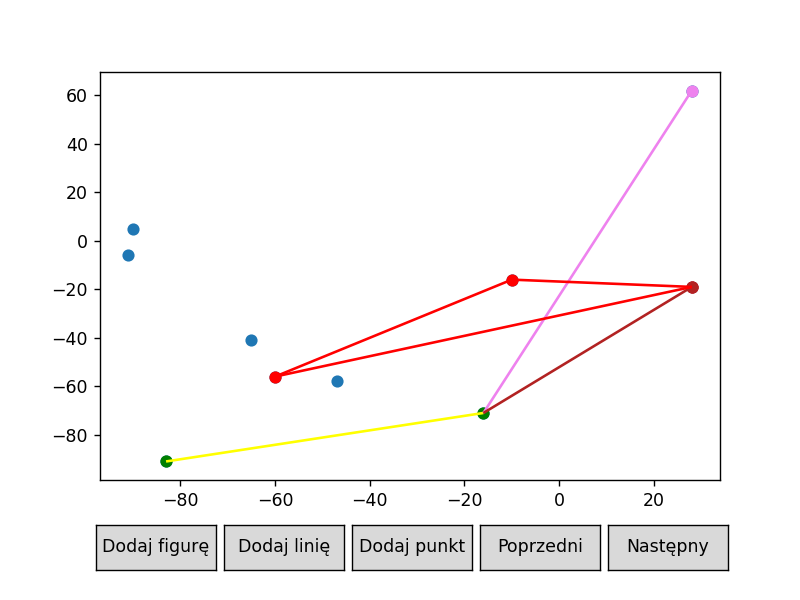

In [14]:
%matplotlib notebook
plot=chan(a,visual=True)
plot.draw()

<a id='section_id'></a>

### Chan  - wizualizacja dla punktów o rozkładzie kołowym

<a id="chanb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#chan)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


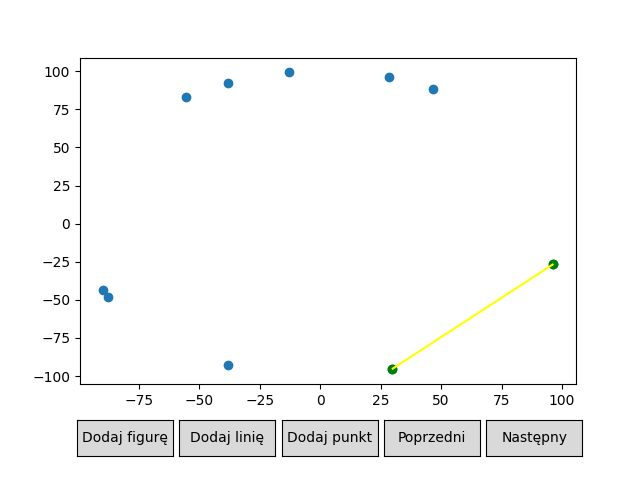

In [48]:
%matplotlib notebook
plot=chan(b,visual=True)
plot.draw()

<a id='section_id'></a>

### Chan   - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="chanc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#chan)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook
plot=chan(c,visual=True)
plot.draw()

<a id='section_id'></a>

### Chan   - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="chand"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#chan)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook
plot=chan(d,visual=True)
plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm QuickHull

<a id="quickhull"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod

<a id='section_id'></a>

In [44]:
def furthest(a, b, considering):
    n = len(considering)
    i = 0
    ans = None
    while i < n:
        if det(a, b, considering[i]) < 0:  # rozwazany wierzcholek jest po prawej stronie ab
            if ans == None or det(a, b, considering[i]) < det(a, b,
                                                              ans):  # |det(a,b,c)| = 1/2|ab|*h, gdzie h jest wysokoscia z c na ab
                ans = considering[i]
        i += 1
    return ans


def insideTriangle(a, b, c, i):
    if det(a, b, i) >= 0 and det(b, c, i) >= 0 and det(c, a, i) >= 0:
        return True
    return False


def removeInner(a, b, c, considering):
    new=[]
    for i in considering:
        if not insideTriangle(a, b, c, i):
            new.append(i)
    considering.clear()
    considering+=new

def quickHullUtil(a, b, considering,plot=None,hull=None):     
    if len(considering) == 0:
        return []
    
    if plot!=None :
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(considering)),
                                     PointsCollection(deepcopy(hull),color='green')],
                           lines=[LinesCollection([[a,b]],color='yellow')]))
        
    c = furthest(a, b, considering)
    if c == None:
        return []
    considering.remove(c)
    
    if plot!=None :
        hull.append(c)
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(considering)),
                                     PointsCollection(deepcopy(hull),color='green'),
                                    PointsCollection([c],color='red')],
                           lines=[LinesCollection([[a,b]],color='yellow')]))
    
    if plot!=None :
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(considering)),
                                     PointsCollection(deepcopy(hull),color='green')],
                           lines = [LinesCollection([[a,c],[b,c]],color='yellow')]))

    removeInner(a, c, b, considering)
    
    if plot!=None :
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(considering)),
                                     PointsCollection(deepcopy(hull),color='green')],
                           lines = [LinesCollection([[a,b],[a,c],[b,c]],color='yellow')]))
    
        z=quickHullUtil(a, c, considering,plot,hull)
        
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(considering)),
                                     PointsCollection(deepcopy(hull),color='green')],
                           lines = [LinesCollection([[b,c]],color='yellow')]))
        
        return z +[c]+ quickHullUtil(c, b, considering,plot,hull)
    
    return quickHullUtil(a, c, considering) +[c]+ quickHullUtil(c, b, considering)


def quickHull(points,visual=False):
    a = min(points, key=lambda x: x[0])
    b = max(points, key=lambda x: x[0])

    considering = deepcopy(points)
    
    if visual==True:
        plot=Plot(scenes=[Scene(points=[PointsCollection(deepcopy(considering))])])
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(considering)),
                                     PointsCollection([a,b],color='red')]))

    considering.remove(a)
    considering.remove(b)
    
    
    if visual:
        hull=[a,b]
        hoax =[a]+quickHullUtil(a, b, considering,plot,hull) +[b] + quickHullUtil(b, a, considering,plot,hull)
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(points)),PointsCollection(deepcopy(hoax),color='green')],
                           lines=[LinesCollection(makeFullSheaf(hoax),color='yellow')]))
        return plot
    
    return [a]+quickHullUtil(a, b, considering)+[b]+  quickHullUtil(b, a, considering)

<a id='section_id'></a>

### QuickHull - wizualizacja dla chmury punktów

<a id="quickhulla"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#quickhull)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


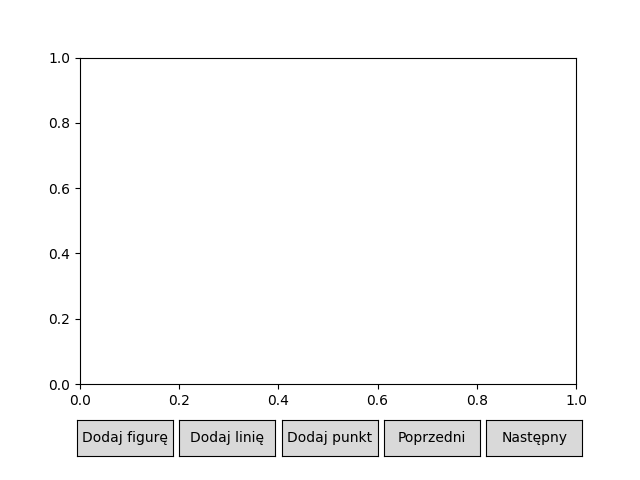

In [45]:
%matplotlib notebook
plot=quickHull(a,visual=True)
plot.draw()

<a id='section_id'></a>

### QuickHull - wizualizacja dla punktów o rozkładzie kołowym

<a id="quickhullb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#quickhull)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


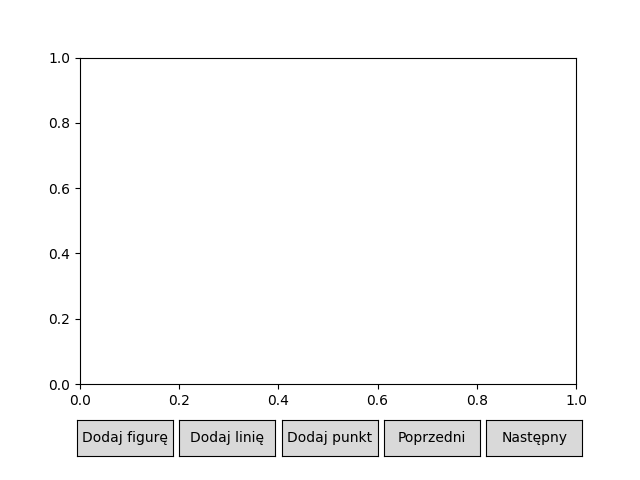

In [46]:
%matplotlib notebook
plot=quickHull(b,visual=True)
plot.draw()

<a id='section_id'></a>

### QuickHull  - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="quickhullc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#quickhull)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


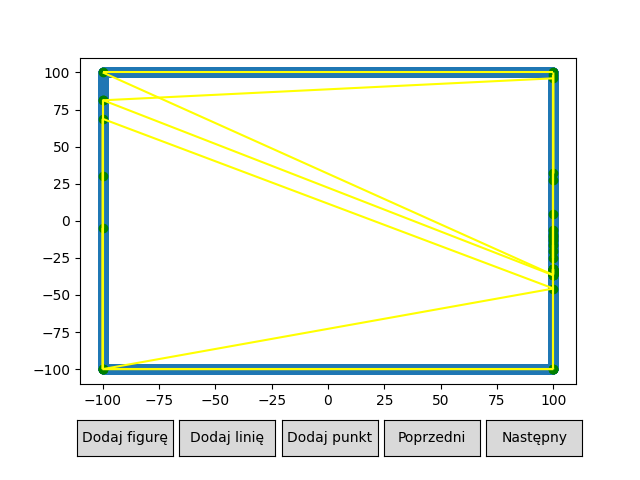

In [47]:
%matplotlib notebook
plot=quickHull(c,visual=True)
plot.draw()

<a id='section_id'></a>

### QuickHull  - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="quickhulld"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#quickhull)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


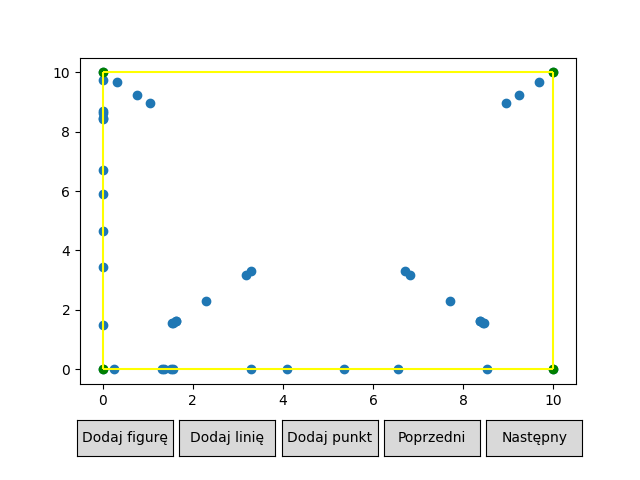

In [38]:
%matplotlib notebook
plot=quickHull(d,visual=True)
plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

# Sekcja pomiarów czasu

<a id="pomiary"></a>


### Funkcja do pomiaru czasów

<a id='section_id'></a>

In [45]:
import time

def timemesure(setFunction,hoaxFunctions,n1=1000,n2=20000,gaps=100):#zwraca wyniki pomiarów dla danych funkcji
    #w takiej kolejności, w jakeij sa podane w hoax Functions
    
    time_results=[]
    for j in range(n1,n2,gaps):
        time_result=[]
        a=setFunction(n=i)
        for i in range(len(hoaxFunction)):
            start=time.time()
            hoaxFunction(a)
            stop=time.time()
            time_result.append((i,stop-start))
        time_results.append(time_result)
        
    return time_results

<a id='section_id'></a>

<a id='section_id'></a>

## Zredefiniowane kody funkcji funkcji wyznaczających otoczkę bez wizualizacji - wizualizacja mogła by wpływać na korzyść niektórych i niekorzyść innych. Przed uruchomieniem pomiarów czasu uruchomić komórki z nowymi definicjami.

<a id="jarvis"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)


<a id='section_id'></a>

### Jarvis

<a id='section_id'></a>

<a id='section_id'></a>

### Graham

<a id='section_id'></a>

<a id='section_id'></a>

### Dolna górna

<a id='section_id'></a>

### Przyrostowy

<a id='section_id'></a>

<a id='section_id'></a>

### Dziel i zwyciężaj

<a id='section_id'></a>

<a id='section_id'></a>

### Chan

<a id='section_id'></a>

<a id='section_id'></a>

### Quick Hull

<a id='section_id'></a>

<a id='section_id'></a>

## Pomiary

<a id='section_id'></a>

<a id='section_id'></a>

### Chmura punktów

<a id='section_id'></a>

<a id='section_id'></a>

### Rozkład kołowy

<a id='section_id'></a>

<a id='section_id'></a>

### Losowy rozkład na prostokącie

<a id='section_id'></a>

<a id='section_id'></a>

### Wierzchołki kwadratu, jego przekątne i dwa boki o wspólnym wierzchołku

<a id='section_id'></a>

<a id='section_id'></a>